## This note book gives the trend of a single word in single mailing list.

In [1]:
%matplotlib inline

In [2]:
from bigbang.archive import Archive
import bigbang.parse as parse
import bigbang.graph as graph
import bigbang.mailman as mailman
import bigbang.process as process
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint as pp
import pytz
import numpy as np
import math
import nltk
from itertools import repeat
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()
from nltk.corpus import stopwords
import re

In [3]:
urls = ["http://mail.scipy.org/pipermail/ipython-dev/"]#,
        #"http://mail.scipy.org/pipermail/ipython-user/"],
        #"http://mail.scipy.org/pipermail/scipy-dev/",
        #"http://mail.scipy.org/pipermail/scipy-user/",
        #"http://mail.scipy.org/pipermail/numpy-discussion/"]


archives= [Archive(url,archive_dir="../archives") for url in urls]

Opening 138 archive files


In [4]:
checkword = "python" #can change words, should be lower case

In [5]:
df = pd.DataFrame(columns=["MessageId","Date","From","In-Reply-To","Count"])
for row in archives[0].data.iterrows():
    try: 
        w = row[1]["Body"].replace("'", "")
        k = re.sub(r'[^\w]', ' ', w)
        k = k.lower()
        t = nltk.tokenize.word_tokenize(k)
        subdict = {}
        count = 0
        for g in t:
            try:
                word = st.stem(g)
            except:
                print g
                pass
            if word == checkword:
                count += 1
        if count == 0:
            continue
        else:
            subdict["MessageId"] = row[0]
            subdict["Date"] = row[1]["Date"]
            subdict["From"] = row[1]["From"]
            subdict["In-Reply-To"] = row[1]["In-Reply-To"]
            subdict["Count"] = count
            df = df.append(subdict,ignore_index=True)
    except:
        if row[1]["Body"] is None: 
            print '!!! Detected an email with an empty Body field...'
        else: print 'error'

In [6]:
df[:5]  #dataframe of informations of the particular word.

,MessageId,Date,From,In-Reply-To,Count
0,<3E9E4094.7030802@colorado.edu>,2003-04-16 23:50:12-06:00,fperez@colorado.edu (Fernando Perez),<003d01c28a9a$3dcb8560$e301340a@cyberhigh.fcoe...,2
1,<3E9E4094.7030802@colorado.edu>,2003-04-16 23:50:12-06:00,fperez at colorado.edu (Fernando Perez),<003d01c28a9a$3dcb8560$e301340a@cyberhigh.fcoe...,2
2,<000c01c304ee$3cb79e60$e901340a@cyberhigh.fcoe...,2003-04-17 07:32:56-07:00,cdodt@fcoe.k12.ca.us (Cory Dodt),<3E9E4094.7030802@colorado.edu>,3
3,<000c01c304ee$3cb79e60$e901340a@cyberhigh.fcoe...,2003-04-17 07:32:56-07:00,cdodt at fcoe.k12.ca.us (Cory Dodt),<3E9E4094.7030802@colorado.edu>,3
4,<3E9EC1CA.3060800@colorado.edu>,2003-04-17 09:01:30-06:00,fperez@colorado.edu (Fernando Perez),<000c01c304ee$3cb79e60$e901340a@cyberhigh.fcoe...,6


In [7]:
start_date = df.iloc[0]["Date"]
end_date = df.iloc[len(df.index)-1]["Date"]

In [8]:
start_date

datetime.datetime(2003, 4, 16, 23, 50, 12, tzinfo=tzoffset(None, -21600))

In [9]:
end_date

datetime.datetime(2014, 9, 22, 16, 52, 34, tzinfo=tzoffset(None, 7200))

In [10]:
total_month = (end_date.year - start_date.year)*12 + (end_date.month-start_date.month+1)

In [11]:
total_month

138

In [12]:
k_month = []
temp_year = start_date.year
temp_month = start_date.month
for i in range(total_month):
    k_month.append((temp_year, temp_month))
    if temp_month == 12:
        temp_year += 1
        temp_month = 0
    temp_month += 1

In [16]:
time_dict = {}
for row in df.iterrows():
    if (row[1]['Date'].year, row[1]['Date'].month) not in time_dict:
        time_dict[(row[1]['Date'].year, row[1]['Date'].month)] = row[1]["Count"]
    else:
        time_dict[(row[1]['Date'].year, row[1]['Date'].month)] += row[1]["Count"]

In [17]:
by_month = []
for item in k_month:
    if item in time_dict:
        by_month.append(time_dict[item])
    else:
        by_month.append(0)

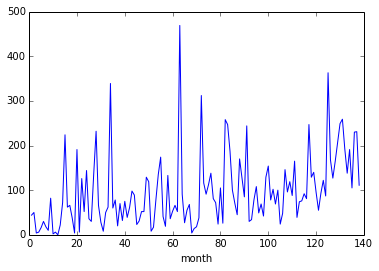

In [19]:
x = range(1,total_month+1)
y = by_month
plt.plot(x, y)
plt.xlabel("month")

In [20]:
y[62] #highest

469

In [21]:
#Check which month is 62
k_month[62]

(2008, 6)